<a href="https://colab.research.google.com/github/aadityamayankar/Covid-Detection-CNN/blob/main/Copy_of_COVID_19_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Dataset : http://cb.lk/covid_19

!wget http://cb.lk/covid_19


--2021-11-28 11:00:23--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 172.67.187.81, 104.21.72.203, 2606:4700:3031::6815:48cb, ...
Connecting to cb.lk (cb.lk)|172.67.187.81|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2021-11-28 11:00:23--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|172.67.187.81|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2021-11-28 11:00:24--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2021-11

In [2]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [3]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

In [5]:
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [7]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')


Found 224 images belonging to 2 classes.


In [9]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [10]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [11]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=6,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
6/6 [==============================] - 24s 2s/step - loss: 2.3453 - accuracy: 0.5990 - val_loss: 0.6798 - val_accuracy: 0.5000
Epoch 2/10
6/6 [==============================] - 10s 2s/step - loss: 0.6530 - accuracy: 0.6198 - val_loss: 0.6249 - val_accuracy: 0.6667
Epoch 3/10
6/6 [==============================] - 10s 2s/step - loss: 0.5113 - accuracy: 0.7604 - val_loss: 0.4382 - val_accuracy: 0.9333
Epoch 4/10
6/6 [==============================] - 10s 2s/step - loss: 0.3735 - accuracy: 0.8594 - val_loss: 0.3100 - val_accuracy: 0.8833
Epoch 5/10
6/6 [==============================] - 10s 2s/step - loss: 0.3102 - accuracy: 0.8958 - val_loss: 0.3510 - val_accuracy: 0.9667
Epoch 6/10
6/6 [==============================] - 10s 2s/step - loss: 0.2738 - accuracy: 0.9167 - val_loss: 0.1612 - val_accuracy: 0.9667
Epoch 7/10
6/6 [==============================] - 10s 2s/step - loss: 0.1689 - accuracy: 0.9479 - val_loss: 0.1278 - val_accuracy: 0.9667
Epoch 8/10
6/6 [==================

In [12]:
model.save("model_adv.h5")

In [13]:
model.evaluate(train_generator)

7/7 [==============================] - 8s 1s/step - loss: 0.1043 - accuracy: 0.9732


[0.10429806262254715, 0.9732142686843872]

In [14]:
model.evaluate(validation_generator)

2/2 [==============================] - 2s 812ms/step - loss: 0.0854 - accuracy: 0.9833


[0.08537198603153229, 0.9833333492279053]

Test Images


In [15]:
model = load_model("model_adv.h5")

In [16]:
import os

In [48]:
print(train_generator.class_indices)

{'Covid': 0, 'Normal': 1}


In [59]:
y_actual,y_test = [],[]

In [60]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
  img = image.load_img("./CovidDataset/Val/Normal/"+i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = (model.predict(img)).astype("int32")
  y_test.append(p[0,0])
  y_actual.append(1)

In [61]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
  img = image.load_img("./CovidDataset/Val/Covid/"+i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = (model.predict(img)).astype("int32")
  y_test.append(p[0,0])
  y_actual.append(0)

In [62]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
cm = confusion_matrix(y_test,y_actual)

In [65]:
import seaborn as sns

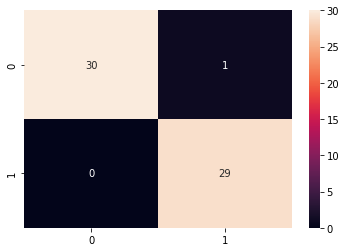

In [66]:
sns.heatmap(cm,annot=True)

In [67]:
img = image.load_img("./CovidDataset/Val/Normal/NORMAL2-IM-0851-0001.jpeg",target_size=(224,224))
img = image.img_to_array(img)
img = np.expand_dims(img,axis=0)
p = (model.predict(img)).astype("int32")
print("Normal" if p[0][0] else "Covid")

Normal
